In [5]:
import numpy as np
import pandas as pd
from test_estimate_distance_matrix import evaluate
from estimate_distance_matrix import distance_matrix_from_locs, estimate_distance_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from scipy.special import ndtr
import json

In [6]:
# n = 11
# # fitted from dataset
# params = (1.0, -46.123430636476016, 2.902844191159571, 3.9405315173088855, -100)
# spring_params = (100, 0.2, 0.1, False, 3)

# true_locs = np.array([[1.0,7.0],[14.0,3.0],[3.0,19.0],[21.0,18.0],[9.0,33.0],[22.0,3.0],[10.0,11.0],[3.0,32.0],[27.0,27.0],[20.0,12.0],[18.0,34.0]])
# true_locs = 0.3048*true_locs # convert to meters
# true_dist_matrix = distance_matrix_from_locs(true_locs)

# # This data comes from: http://anrg.usc.edu/www/download_files/RSSLocalizationDataSet_11nodes.txt
# rss_matrix = np.array([[-100, -68.308, -62.299, -67.051, -68.141, -66.400, -60.864, -77.891, -68.217, -69.553, -68.678],
#                 [-67.414, -100, -68.205, -65.299, -69.623, -55.270, -59.656, -71.891, -69.178, -65.439, -74.507],
#                 [-60.025, -67.713, -100, -65.146, -64.812, -67.982, -58.420, -62.949, -70.291, -68.334, -69.354],
#                 [-68.820, -67.432, -67.988, -100, -68.111, -64.830, -65.680, -70.307, -56.207, -53.938, -67.278],
#                 [-66.090, -68.082, -64.801, -64.279, -100, -73.314, -63.975, -49.990, -62.357, -71.328, -54.147],
#                 [-67.572, -55.854, -70.355, -64.174, -77.715, -100, -77.591, -88.658, -68.432, -57.822, -73.303],
#                 [-62.527, -62.622, -62.680, -65.855, -68.123, -70.461, -100, -70.402, -73.127, -65.211, -79.361],
#                 [-77.521, -74.398, -65.662, -70.068, -50.838, -86.564, -70.062, -100, -70.560, -81.057, -67.722],
#                 [-68.896, -70.385, -72.194, -54.641, -63.342, -67.637, -70.941, -69.543, -100, -65.686, -63.720],
#                 [-66.488, -63.775, -66.978, -51.330, -69.295, -56.240, -63.301, -78.221, -65.041, -100, -70.042],
#                 [-72.078, -80.838, -73.341, -68.369, -57.963, -76.385, -79.549, -68.691, -66.980, -73.718, -100]])

# print(true_dist_matrix)

In [7]:
with open("scenario_data.json") as f:
    scenarios = json.load(f)

[1, -62.919, 2.3158, 3.4418, -100]
[[0.   0.8  1.   1.28]
 [0.8  0.   1.28 1.  ]
 [1.   1.28 0.   0.8 ]
 [1.28 1.   0.8  0.  ]]
[[  0.         -65.4047619  -65.77142857 -65.88460502]
 [-65.4047619    0.         -65.88460502 -65.77142857]
 [-65.77142857 -65.88460502   0.         -65.4047619 ]
 [-65.88460502 -65.77142857 -65.4047619    0.        ]]
phone_table
rss_pre_averaged
[0.6      0.33     0.046875 0.046875 0.33     0.6     ]
phone_table
mds_metric
[0.375     0.15      0.2421875 0.2421875 0.15      0.375    ]


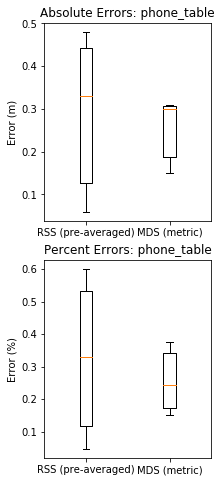

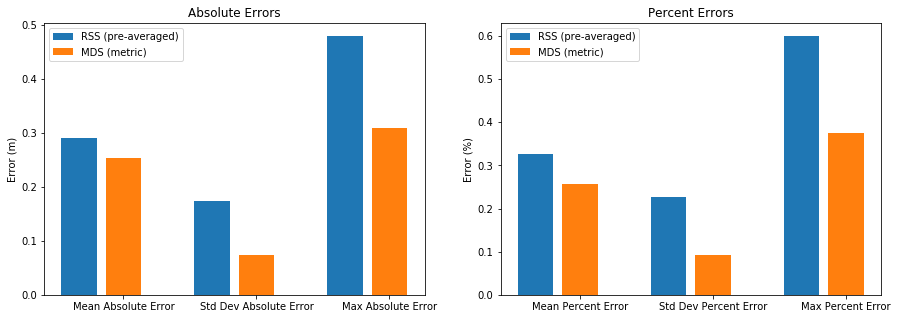

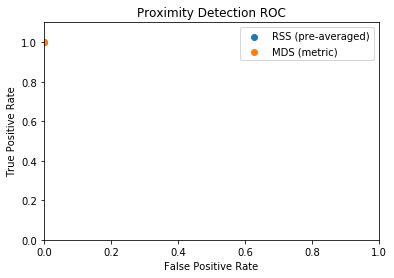

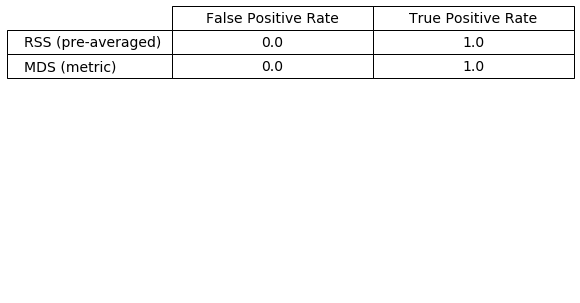

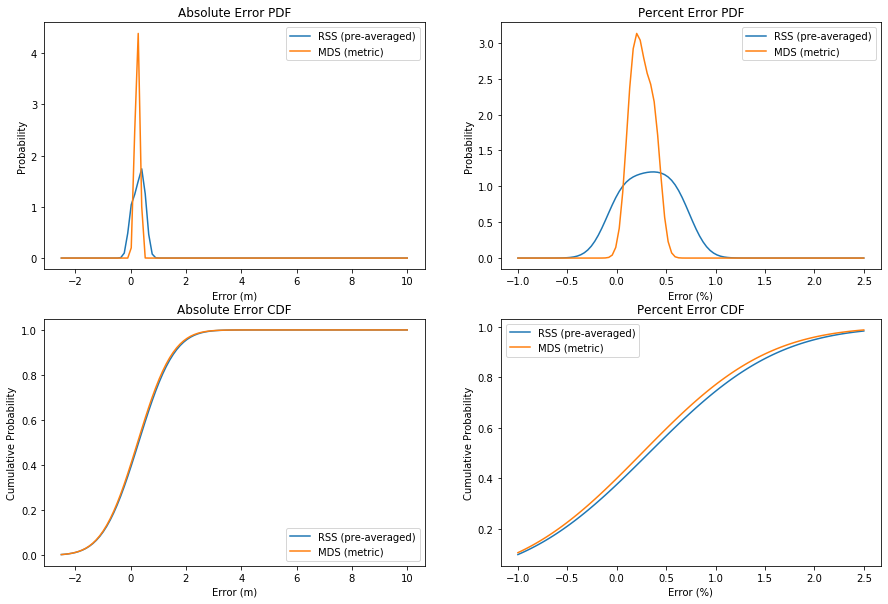

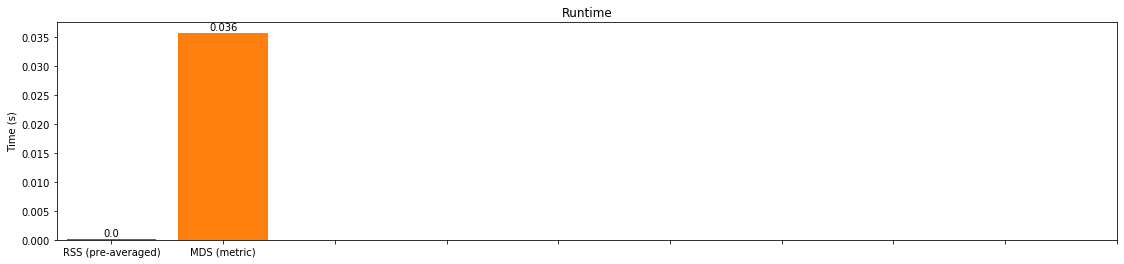

[1, -62.919, 2.3158, 3.4418, -100]
[[0.   0.8  1.   1.28]
 [0.8  0.   1.28 1.  ]
 [1.   1.28 0.   0.8 ]
 [1.28 1.   0.8  0.  ]]
[[  0.         -89.29166667 -81.38888889 -99.73485336]
 [-89.29166667   0.         -99.73485336 -81.38888889]
 [-81.38888889 -99.73485336   0.         -89.29166667]
 [-99.73485336 -81.38888889 -89.29166667   0.        ]]
phone_pocket
rss_pre_averaged
[16.2125  5.27   29.375  29.375   5.27   16.2125]
phone_pocket
mds_metric
[29.725     10.19      20.1015625 20.1015625 10.19      29.725    ]


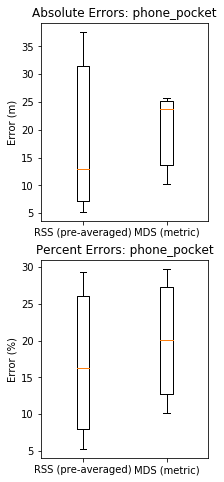

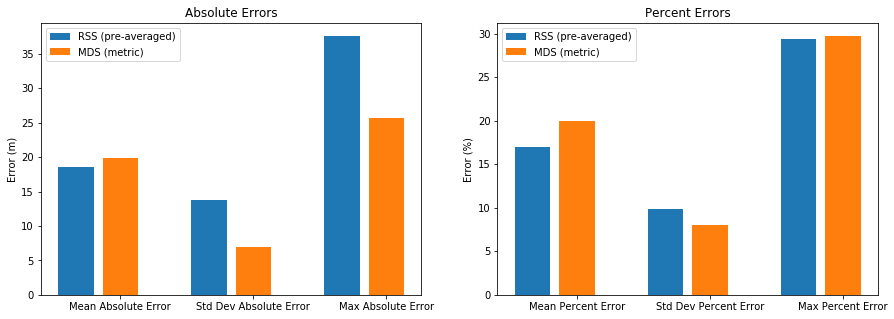

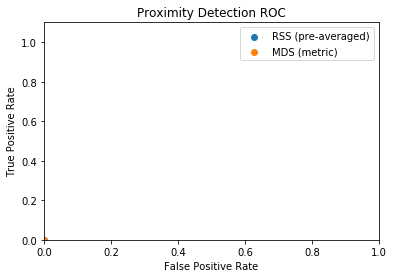

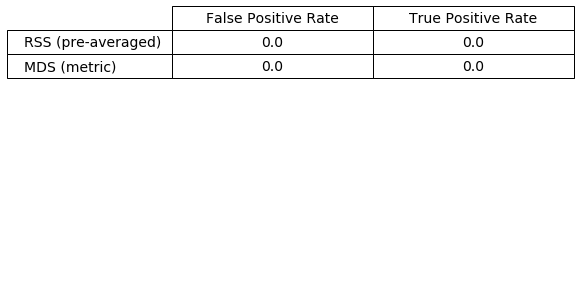

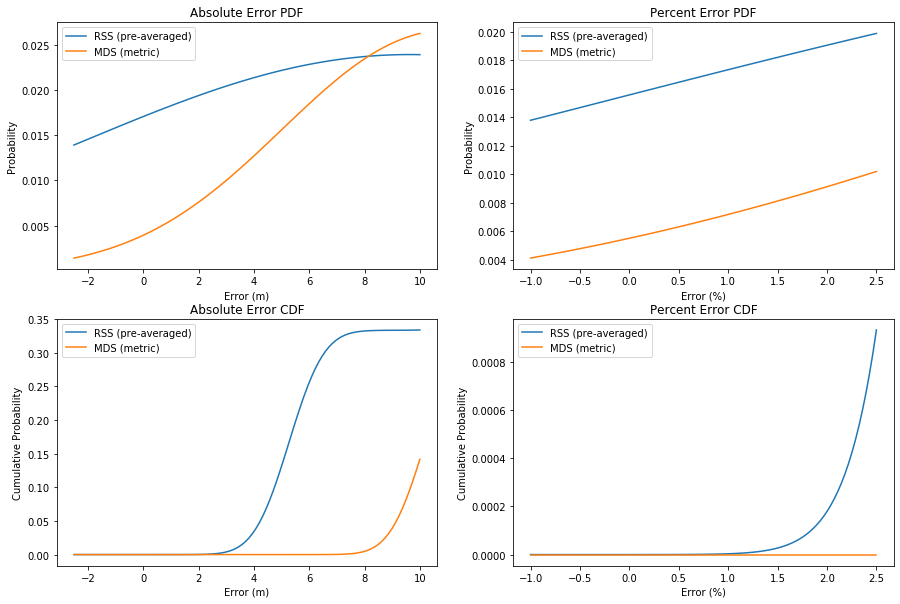

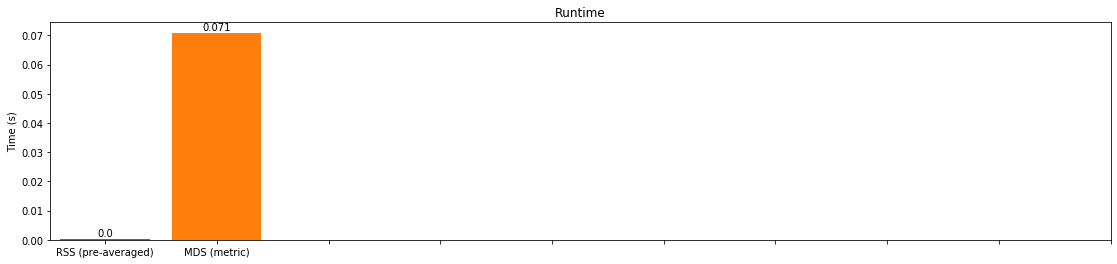

[1, -60.4517, 1.364, 5.054, -100]
[[0.   1.   2.7  1.  ]
 [1.   0.   1.7  1.41]
 [2.7  1.7  0.   2.88]
 [1.   1.41 2.88 0.  ]]
[[  0.         -65.99065421 -69.56696429 -62.02272727]
 [-65.99065421   0.         -62.77059112 -62.38076928]
 [-69.56696429 -62.77059112   0.         -64.37910672]
 [-62.02272727 -62.38076928 -64.37910672   0.        ]]
train
rss_pre_averaged
[1.55       0.72592593 0.3        0.12941176 0.0212766  0.32638889]
train
mds_metric
[1.73       0.51851852 0.69       0.07647059 0.10638298 0.15972222]


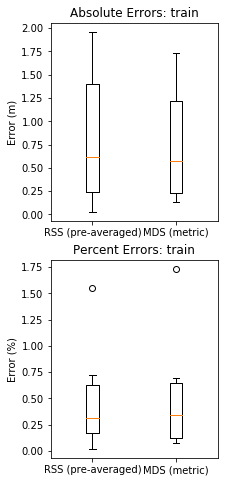

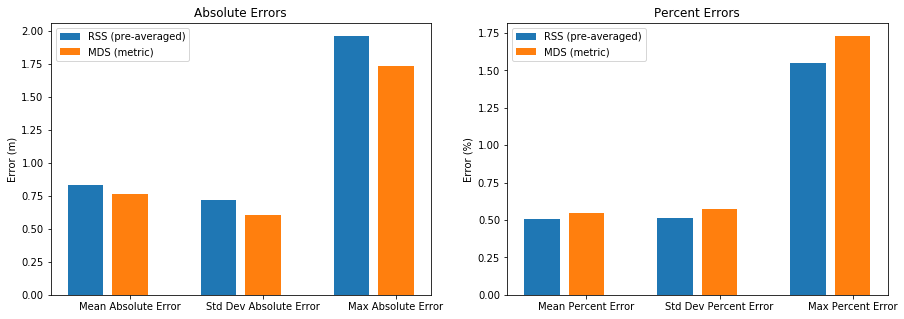

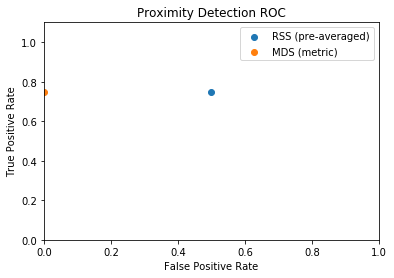

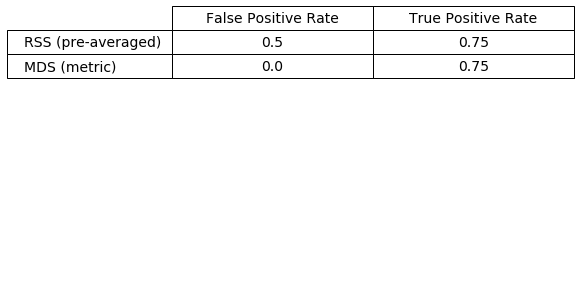

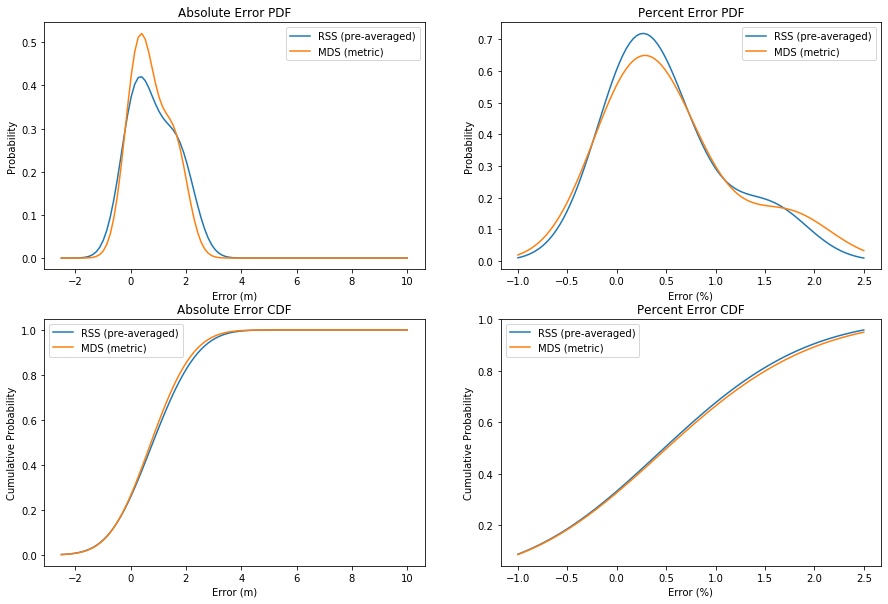

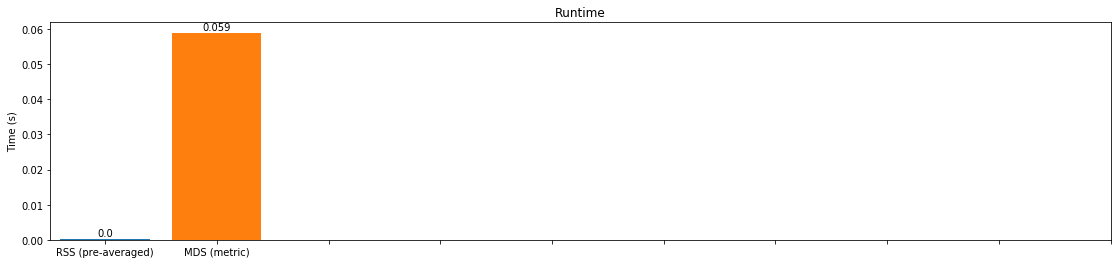

[1, -75.014, 1.7919, 6.4484, -100]
[[0. 2. 4.]
 [2. 0. 2.]
 [4. 2. 0.]]
[[  0.         -87.31818182 -95.34883721]
 [-87.31818182   0.         -87.31818182]
 [-95.34883721 -87.31818182   0.        ]]
simple_grocery
rss_pre_averaged
[1.43 2.41 1.43]
simple_grocery
mds_metric
[2.085  2.0825 2.085 ]


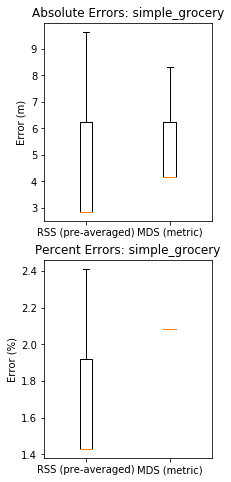

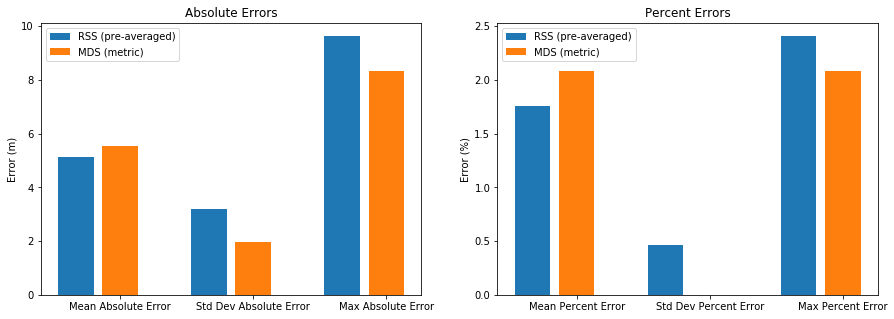

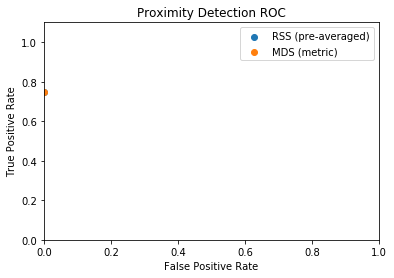

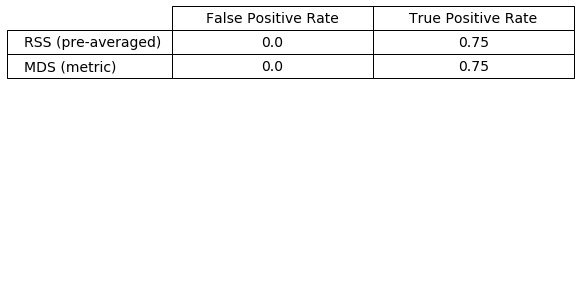

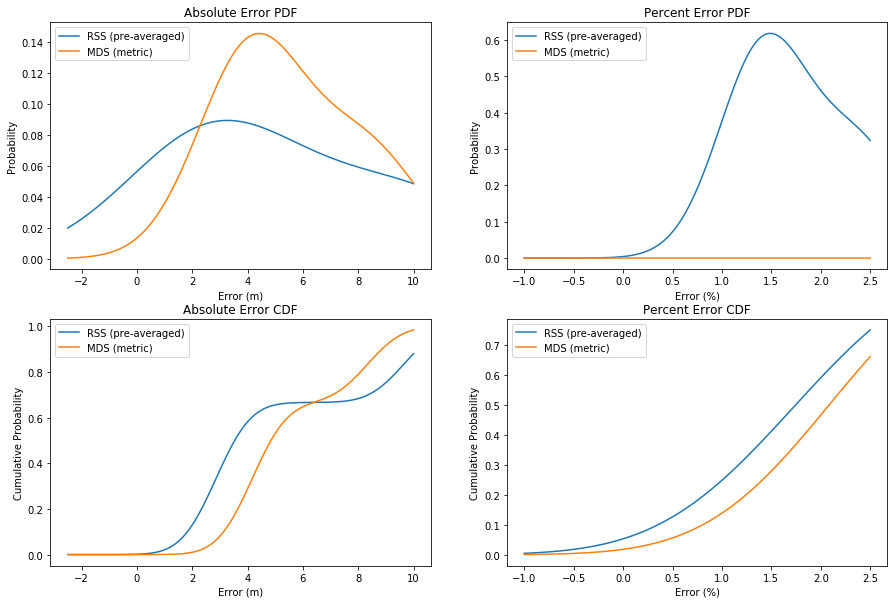

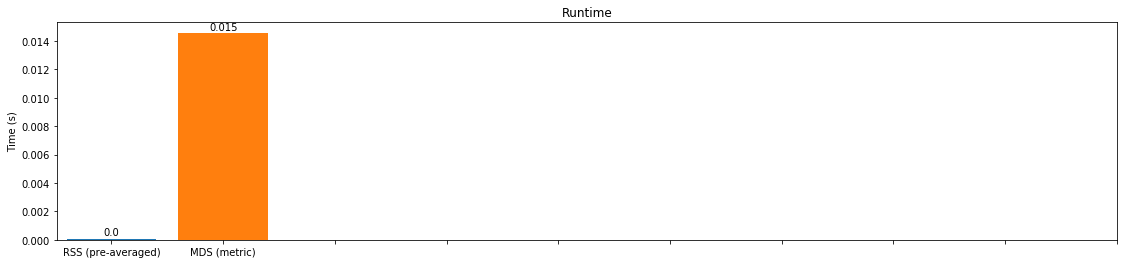

In [9]:
for scenario in ["phone_table","phone_pocket","train","simple_grocery"]:
    scen = scenarios[scenario]

    n = len(scen["locs"])
    params = scen["params"]
    print(params)
    spring_params = (100, 0.2, 0.1, False, 10)
    true_locs = np.array(scen["locs"])
    true_dist_matrix = distance_matrix_from_locs(true_locs)
    rss_matrix = np.array(scen["rss"])
    print(true_dist_matrix)
    print(rss_matrix)

    # fig0, (ax_a, ax_b) = plt.subplots(2,1,figsize=(19,10))
    fig0, (ax_a, ax_b) = plt.subplots(2,1,figsize=(3,8))
    ax_a_values = []
    ax_b_values = []

    ##### ERROR PLOTS ###########
    fig1, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5))
    metrics1 = ["MAE", "STDAE", "maxAE"]
    metrics2 = ["MPE", "STDPE", "maxPE"]
    x = np.arange(3)  # the label locations
    width = 0.35  # the width of the bars
    # models = ["rss_only","rss_pre_averaged","rss_post_averaged","mds_metric","mds_non_metric","sdp",
    #           "spring_model","sdp_init_spring","isomap","lle"]
    models = ["rss_pre_averaged","mds_metric"]
    model_names = {"rss_pre_averaged":"RSS (pre-averaged)","mds_metric":"MDS (metric)"}
    # model_names = {"rss_only":"RSS",
    #                "rss_pre_averaged":"RSS (pre-averaged)",
    #                "rss_post_averaged":"RSS (post-averaged)",
    #                "mds_metric":"MDS (metric)", 
    #                "mds_non_metric":"MDS (non-metric)", "sdp":"SDP", 
    #                "spring_model":"Spring Model",
    #                "sdp_init_spring":"Spring Model (from SDP)",
    #                "isomap":"Isomap",
    #                "lle":"Local Linear Embedding"}
    # models = ["rss_only","rss_pre_averaged","rss_post_averaged"]
    x = x*(len(models)+1)

    ####### CLASSIFICATION #########
    fig2, ax3 = plt.subplots()
    fig3, ax4 = plt.subplots()
    fig3.patch.set_visible(False)
    ax4.axis('off')
    ax4.axis('tight')
    classification = []

    ####### PROB DENSITIES ##########
    fig4, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2,2,figsize = (15,10))

    ##### RUNTIME #####
    fig5, ax9 = plt.subplots(figsize=(19,4))

    for i, model in enumerate(models):
        dist_matrix, est_locs, time_elapsed = estimate_distance_matrix(rss_matrix,use_model=model,estimate_distance_params=params,spring_model_params=spring_params)
        MAE, STDAE, maxAE, MPE, STDPE, maxPE, TP, FP, TN, FN, absolute_errors, percent_errors = evaluate(true_dist_matrix,dist_matrix)
        print(scenario)
        print(model)
        print(percent_errors)
        if False:
            print("Mean absolute error:",MAE)
            print("Std Dev absolute error:",STDAE)
            print("Max absolute error:",maxAE)
            print("Mean percent error:",MPE)
            print("Std Dev percent error:",STDPE)
            print("Max percent error:",maxPE)
            print("True positive:",TP)
            print("False positive:",FP)
            print("True negative:",TN)
            print("False negative:",FN)
            print("Time elapsed:",time_elapsed)
            print("Estimated distance matrix",model)
            print(dist_matrix)

        ax1.bar(x+i, [MAE, STDAE, maxAE], label=model_names[model])
        ax2.bar(x+i, [MPE, STDPE, maxPE], label=model_names[model])

        ax_a_values.append(absolute_errors)
        ax_b_values.append(percent_errors)

        try:
            FPR = FP/(FP+TN)
        except ZeroDivisionError:
            FPR = 0
        try:
            TPR = TP/(TP+FN)
        except ZeroDivisionError:
            TRP = 0
        ax3.scatter(FPR,TPR,label=model_names[model])
        classification.append([FPR,TPR])

        kdeAE = gaussian_kde(absolute_errors)
        xAE = np.linspace(-2.5, 10, 100)
        kdeAE_pdf = kdeAE.evaluate(xAE)
        ax5.plot(xAE,kdeAE_pdf,label=model_names[model])

        kdePE = gaussian_kde(percent_errors)
        xPE = np.linspace(-1, 2.5, 100)
        kdePE_pdf = kdePE.evaluate(xPE)
        ax6.plot(xPE,kdePE_pdf,label=model_names[model])

        stdevAE = np.sqrt(kdeAE.covariance)[0, 0]
        pdeAE_cdf = ndtr(np.subtract.outer(xAE, absolute_errors)).mean(axis=1)
        ax7.plot(xAE, pdeAE_cdf,label=model_names[model])

        stdevPE = np.sqrt(kdePE.covariance)[0, 0]
        pdePE_cdf = ndtr(np.subtract.outer(xPE, percent_errors)).mean(axis=1)
        ax8.plot(xPE, pdePE_cdf,label=model_names[model])

        rect = ax9.bar(x[0]+i, [time_elapsed], label=model_names[model])
        ax9.annotate('{}'.format(round(time_elapsed,3)),
                    xy=(x[0]+i, time_elapsed),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax_a.boxplot(ax_a_values)
    ax_a.set_xticklabels(list(model_names.values()))
    ax_a.set_ylabel('Error (m)')
    ax_a.set_title('Absolute Errors: '+scenario)

    ax_b.boxplot(ax_b_values)
    ax_b.set_xticklabels(list(model_names.values()))
    ax_b.set_ylabel('Error (%)')
    ax_b.set_title('Percent Errors: '+scenario)

    ##### ERROR PLOTS ###########
    ax1.set_ylabel('Error (m)')
    ax1.set_title('Absolute Errors')
    ax1.set_xticks(x+np.floor(len(models)/2))
    ax1.set_xticklabels(["Mean Absolute Error","Std Dev Absolute Error","Max Absolute Error"])
    ax1.legend()
    # ax2.yaxis.set_label_position("right")
    # ax2.yaxis.tick_right()
    ax2.set_ylabel('Error (%)')
    ax2.set_title('Percent Errors')
    ax2.set_xticks(x+np.floor(len(models)/2))
    ax2.set_xticklabels(["Mean Percent Error","Std Dev Percent Error","Max Percent Error"])
    ax2.legend()

    ####### CLASSIFICATION #########
    # ax3.scatter(0,1)
    # ax3.text(0+0.015,1,"IDEAL")
    ax3.set_xlim([0,1])
    ax3.set_ylim([0,1.1])
    ax3.set_xlabel("False Positive Rate")
    ax3.set_ylabel("True Positive Rate")
    ax3.set_title("Proximity Detection ROC")
    ax3.legend()

    classification = np.round(classification,3)
    df = pd.DataFrame(np.array(classification),columns=["False Positive Rate","True Positive Rate"])
    the_table = ax4.table(cellText=df.values,colLabels=df.columns,loc='top',cellLoc='center',
                          rowLabels=list(model_names.values()),colWidths=[0.3 for x in df.columns],)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(14)
    the_table.scale(2, 2)

    ########### PROB DENSITIES ############
    ax5.set_title("Absolute Error PDF")
    ax5.set_xlabel("Error (m)")
    ax5.set_ylabel("Probability")
    ax5.legend()
    ax6.set_title("Percent Error PDF")
    ax6.set_xlabel("Error (%)")
    ax6.set_ylabel("Probability")
    ax6.legend()
    ax7.set_title("Absolute Error CDF")
    ax7.set_xlabel("Error (m)")
    ax7.set_ylabel("Cumulative Probability")
    ax7.legend()
    ax8.set_title("Percent Error CDF")
    ax8.set_xlabel("Error (%)")
    ax8.set_ylabel("Cumulative Probability")
    ax8.legend()

    ### RUNTIME ####
    # ax9.legend()
    ax9.set_ylabel('Time (s)')
    ax9.set_title('Runtime')
    ax9.set_xticks([0,1,2,3,4,5,6,7,8,9])
    ax9.set_xticklabels(list(model_names.values()))

    plt.show()